In [ ]:
%pip install uncertainties

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
import uncertainties as uc

In [ ]:
#datos = pd.read_csv('/content/drive/MyDrive/Emisiones_9.csv')
ppm= [2,4,6,8,10]

#print(datos)
#plt.plot(datos.iloc[:,0].values, datos.iloc[:,2].values, '.', color= 'red')
datos_p = pd.read_csv('/content/Emisiones_piolas.csv')
#lt.plot(datos_p.iloc[:,0].values, datos_p.iloc[:,2].values, '.', color= 'blue')

datos_ajuste = np.array([[np.mean(datos_p.iloc[0:41,2]), np.std(datos_p.iloc[0:41,2])],
 [np.mean(datos_p.iloc[41:85,2]), np.std(datos_p.iloc[41:85,2])],
  [np.mean(datos_p.iloc[85:141,2]), np.std(datos_p.iloc[85:141,2])],
   [np.mean(datos_p.iloc[141:203,2]), np.std(datos_p.iloc[141:203,2])],
    [np.mean(datos_p.iloc[203:272,2]), np.std(datos_p.iloc[203:272,2])]])
#print(datos_p.iloc[203:272,2])
#print(datos_ajuste)

resultados = linregress(ppm, datos_ajuste[:,0])
#print(slope, intercept, r_value, std_err)

#plt.errorbar(ppm, datos_ajuste[:,0], datos_ajuste[:,1] , capsize=4, fmt='o')
#plt.plot(np.linspace(0,12,100), slope * np.linspace(0,12,100) + intercept)
print(datos_ajuste[:,0])
#print(resultados)

[ 41.04878049  83.25       112.66071429 171.14516129 219.30434783]


4.41+/-0.12
2.41+/-0.06
2.33+/-0.06


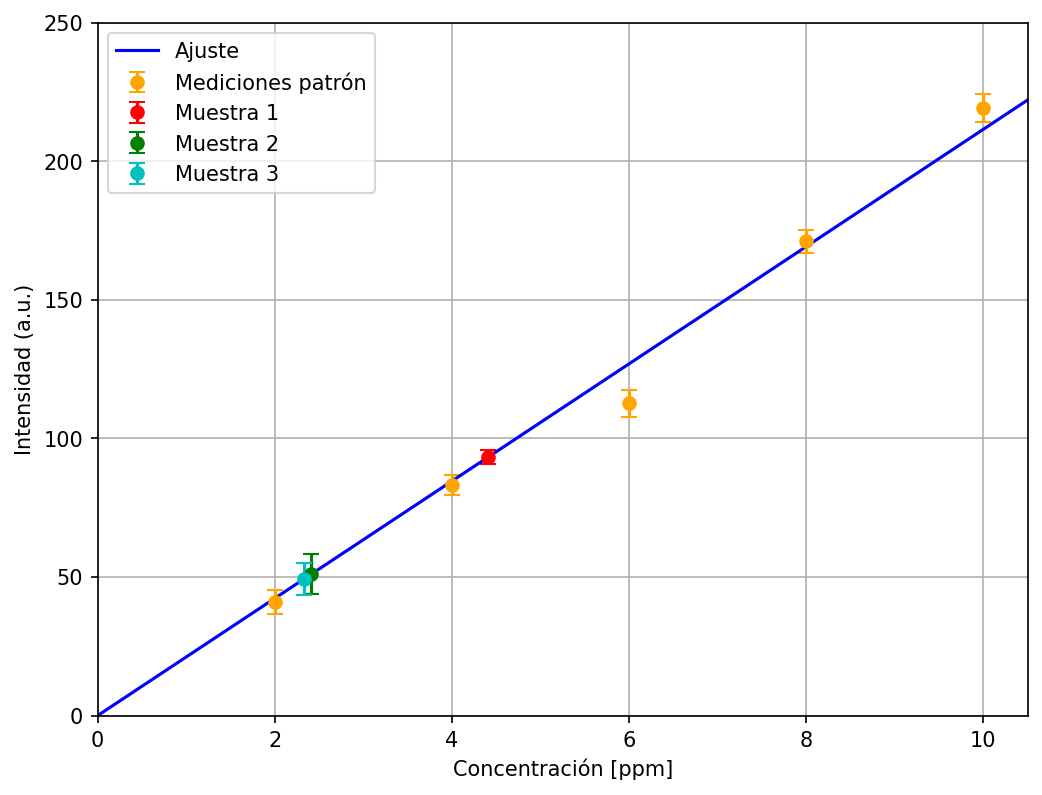

In [ ]:
def ajuste(x, A):
  return A*x

popt, pcov = curve_fit(ajuste, ppm, datos_ajuste[:,0], p0=1)

plt.figure(figsize=(8,6), dpi=150)

plt.errorbar(ppm, datos_ajuste[:,0], datos_ajuste[:,1] , capsize=4, fmt='o', label='Mediciones patrón', color='orange')
plt.errorbar(datos_desc[0,0]/popt, datos_desc[0,0], datos_desc[0,1] , capsize=4, fmt='or', label='Muestra 1')
plt.errorbar(datos_desc[1,0]/popt, datos_desc[1,0], datos_desc[1,1] , capsize=4, fmt='og', label='Muestra 2')
plt.errorbar(datos_desc[2,0]/popt, datos_desc[2,0], datos_desc[2,1] , capsize=4, fmt='oc', label='Muestra 3')
plt.plot(np.linspace(0,12,100),  popt* np.linspace(0,12,100), '-b', label='Ajuste')
#plt.plot(np.linspace(0,12,100), slope * np.linspace(0,12,100) + intercept, '--c', label='Ajuste con $Y_0$ libre')
popt_uc=uc.ufloat(popt, np.sqrt(np.diag(pcov)))
ppm1=datos_desc[0,0]/popt_uc
ppm60=datos_desc[1,0]/popt_uc
ppm15=datos_desc[2,0]/popt_uc
plt.grid()
plt.xlabel('Concentración [ppm]')
plt.ylabel('Intensidad (a.u.)')
plt.xlim(0,10.5)
plt.ylim(0,250)
#plt.xticks(np.linspace())
plt.legend()
print(ppm1)
print(ppm60)
print(ppm15)


In [ ]:
print(pcov)

[[0.30776873]]


[4.40980535 2.41120936 2.32847178]


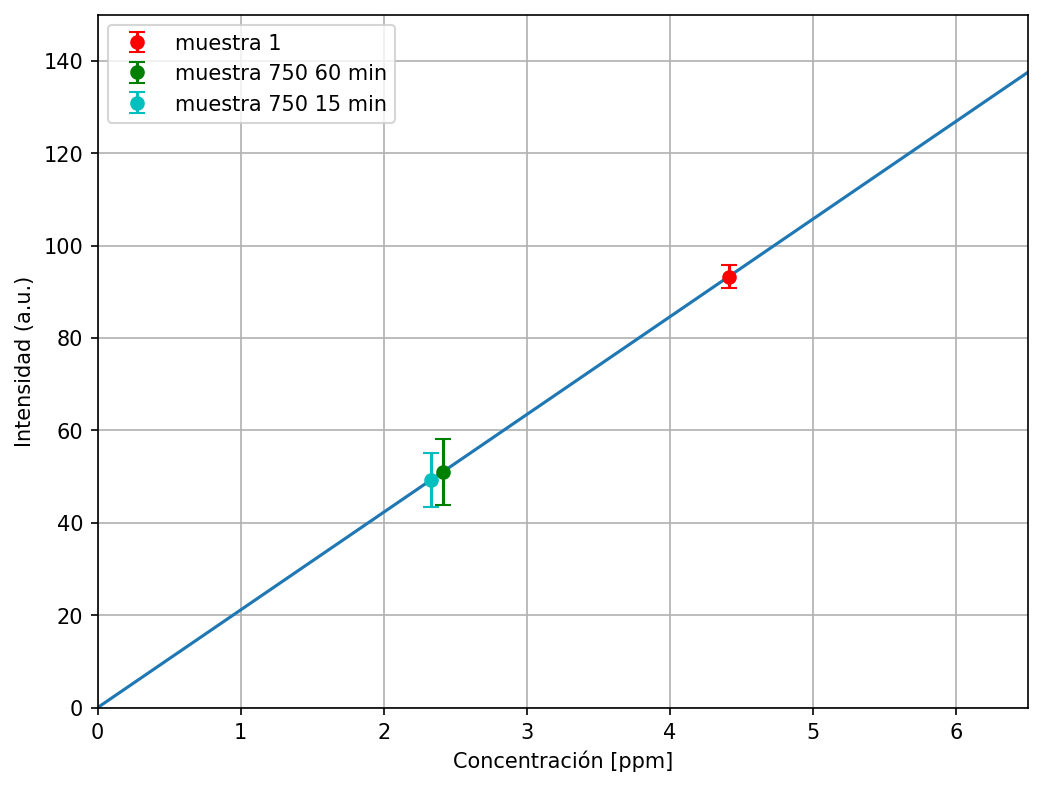

In [ ]:
datos_desc = np.array([[np.mean(datos_p.iloc[272:316,2]), np.std(datos_p.iloc[272:316,2])],
                       [np.mean(datos_p.iloc[316:380,2]), np.std(datos_p.iloc[316:380,2])],
                       [np.mean(datos_p.iloc[380:430,2]), np.std(datos_p.iloc[380:430,2])]])

plt.figure(figsize=(8,6), dpi=150)

plt.plot(np.linspace(0,12,100),  popt* np.linspace(0,12,100))
plt.errorbar(datos_desc[0,0]/popt, datos_desc[0,0], datos_desc[0,1] , capsize=4, fmt='or', label='muestra 1')
plt.errorbar(datos_desc[1,0]/popt, datos_desc[1,0], datos_desc[1,1] , capsize=4, fmt='og', label='muestra 750 60 min')
plt.errorbar(datos_desc[2,0]/popt, datos_desc[2,0], datos_desc[2,1] , capsize=4, fmt='oc', label='muestra 750 15 min')

plt.grid()
plt.xlabel('Concentración [ppm]')
plt.ylabel('Intensidad (a.u.)')
plt.xlim(0,6.5)
plt.ylim(0,150)
#plt.xticks(np.linspace())
plt.legend()
print(datos_desc[:,0]/popt)